In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import plotly.express as px
import seaborn as sns

In [2]:
start = '2010-01-01'
end = '2022-04-14'

In [3]:
data = yf.download("AXISBANK.NS",start,end)
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,198.779999,199.990005,197.619995,198.419998,181.106430,4371510
1,2010-01-05,199.600006,204.000000,199.139999,202.559998,184.885178,7629380
2,2010-01-06,204.000000,205.740005,198.509995,199.160004,181.781860,5953585
3,2010-01-07,199.289993,201.199997,197.820007,200.570007,183.068817,4964525
4,2010-01-08,200.600006,203.979996,199.270004,203.190002,185.460236,7931425
...,...,...,...,...,...,...,...
3026,2022-04-07,769.500000,795.000000,769.200012,792.099976,790.896118,9820244
3027,2022-04-08,794.900024,800.700012,789.000000,794.900024,793.691895,8104237
3028,2022-04-11,789.450012,794.250000,784.049988,786.049988,784.855286,6340427
3029,2022-04-12,780.099976,801.000000,777.799988,798.450012,797.236511,7672215


In [5]:
data = data.set_index(data["Date"])
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,2010-01-04,198.779999,199.990005,197.619995,198.419998,181.106430,4371510
2010-01-05,2010-01-05,199.600006,204.000000,199.139999,202.559998,184.885178,7629380
2010-01-06,2010-01-06,204.000000,205.740005,198.509995,199.160004,181.781860,5953585
2010-01-07,2010-01-07,199.289993,201.199997,197.820007,200.570007,183.068817,4964525
2010-01-08,2010-01-08,200.600006,203.979996,199.270004,203.190002,185.460236,7931425
...,...,...,...,...,...,...,...
2022-04-07,2022-04-07,769.500000,795.000000,769.200012,792.099976,790.896118,9820244
2022-04-08,2022-04-08,794.900024,800.700012,789.000000,794.900024,793.691895,8104237
2022-04-11,2022-04-11,789.450012,794.250000,784.049988,786.049988,784.855286,6340427


In [6]:
del data["Date"]

In [8]:
df = data
df.drop(["Open", "High", "Low", "Close", "Volume"], axis=1, inplace=True)
df

,Adj Close
Date,
2010-01-04,181.106430
2010-01-05,184.885178
2010-01-06,181.781860
2010-01-07,183.068817
2010-01-08,185.460236
...,...
2022-04-07,790.896118
2022-04-08,793.691895
2022-04-11,784.855286


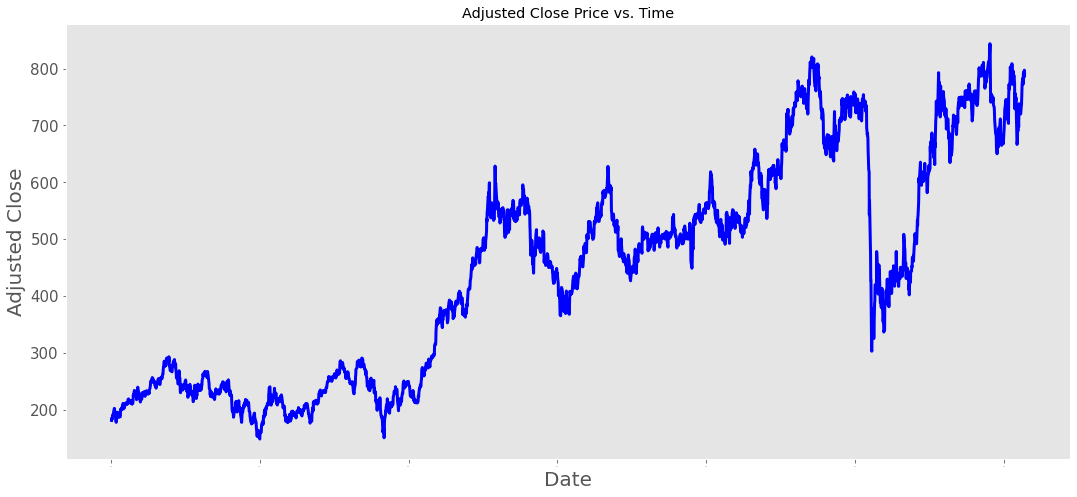

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 8))
plt.grid()
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=-15)
plt.ylabel("Adjusted Close", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Adjusted Close Price vs. Time")
plt.plot(df["Adj Close"], linewidth=3, color="blue")
plt.show()

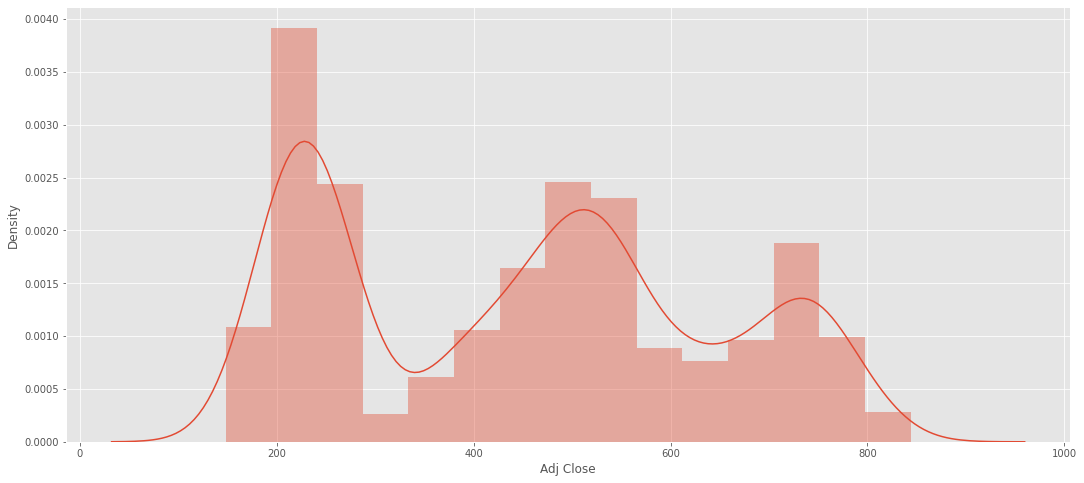

In [17]:
plt.figure(figsize=(18, 8))
sns.distplot(df["Adj Close"])
plt.show()

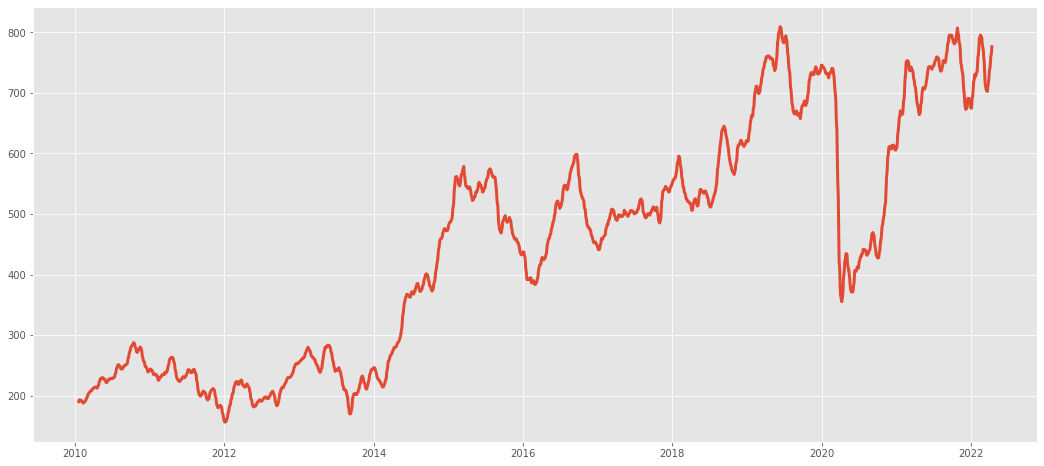

In [18]:
plt.figure(figsize=(18,8))
plt.plot(df["Adj Close"].rolling(12).mean(), linewidth=3)
plt.show()

Result of Dickey Fuller Test
Test Statistics            -54.745517
P-value                      0.000000
No. of Lags                  0.000000
Number of Observations    3029.000000
critical value (1%)         -3.432511
critical value (5%)         -2.862495
critical value (10%)        -2.567278
dtype: float64


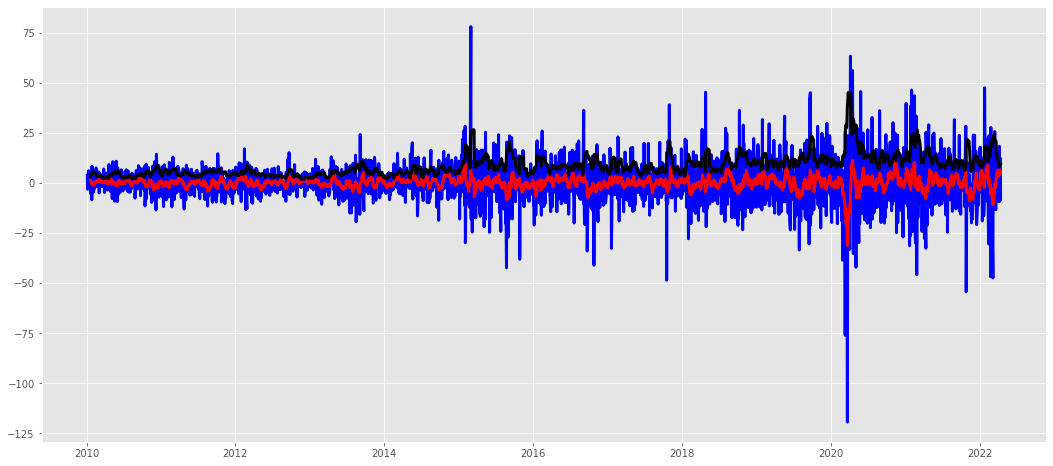

In [19]:
df_adj_close_diff = df["Adj Close"].diff()
df_adj_close_diff.dropna(inplace=True)

plt.figure(figsize=(18,8))
plt.plot(df_adj_close_diff, color="blue", linewidth=3)
plt.plot(df_adj_close_diff.rolling(12).mean(), color="red", linewidth=3)
plt.plot(df_adj_close_diff.rolling(12).std(), color="black", linewidth=3)

print("Result of Dickey Fuller Test")
adft = adfuller(df_adj_close_diff, autolag='AIC')
output = pd.Series(adft[0:4], index=["Test Statistics", "P-value", "No. of Lags", "Number of Observations"])
for key, value in adft[4].items():
    output["critical value (%s)" %key] = value
print(output)

<Figure size 1296x576 with 0 Axes>

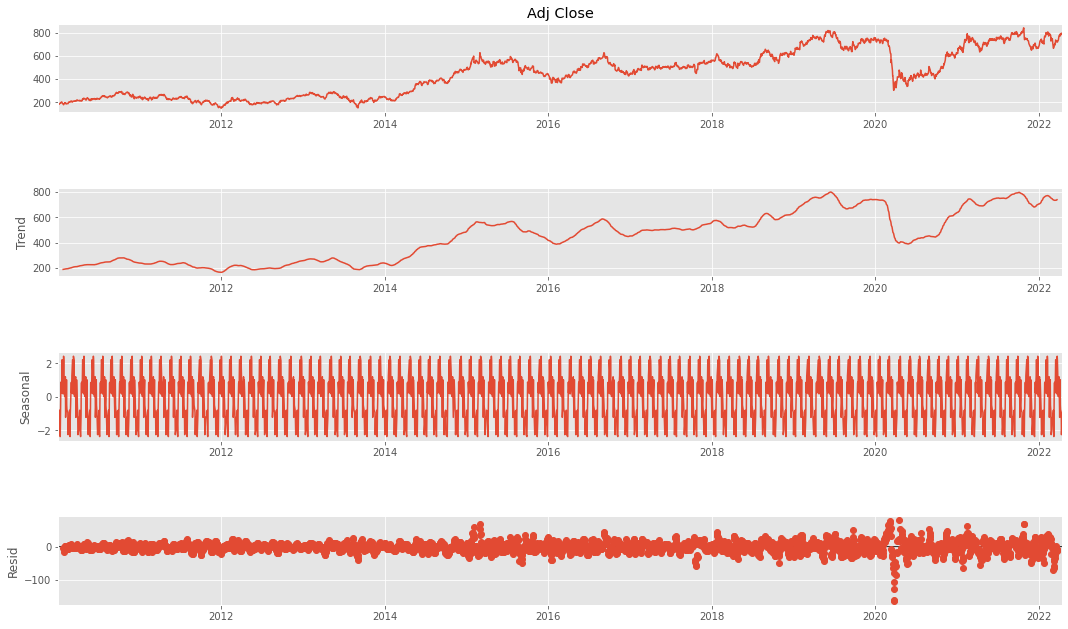

In [21]:
result = seasonal_decompose(df["Adj Close"], period=30)
fig = plt.figure(figsize=(18, 8))
fig = result.plot()
fig.set_size_inches(17, 10)
plt.show()

<Figure size 1296x576 with 0 Axes>

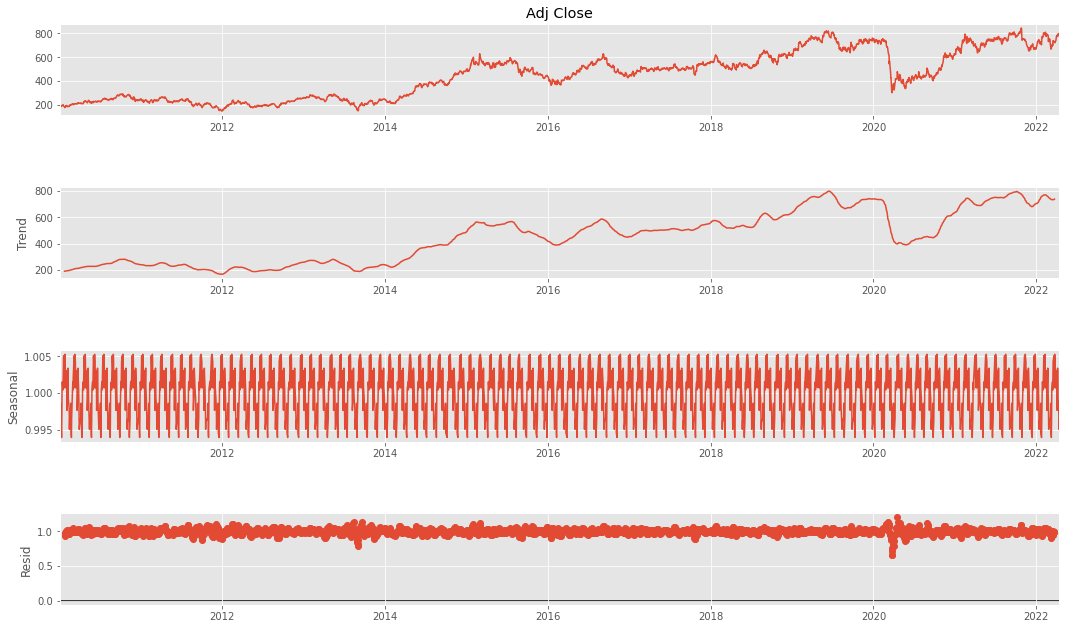

In [22]:
result = seasonal_decompose(df["Adj Close"],model="multiplicative", period=30)
fig = plt.figure(figsize=(18, 8))
fig = result.plot()
fig.set_size_inches(17, 10)
plt.show()

In [26]:
train_data = df[0:-260]
test_data = df[-260:]

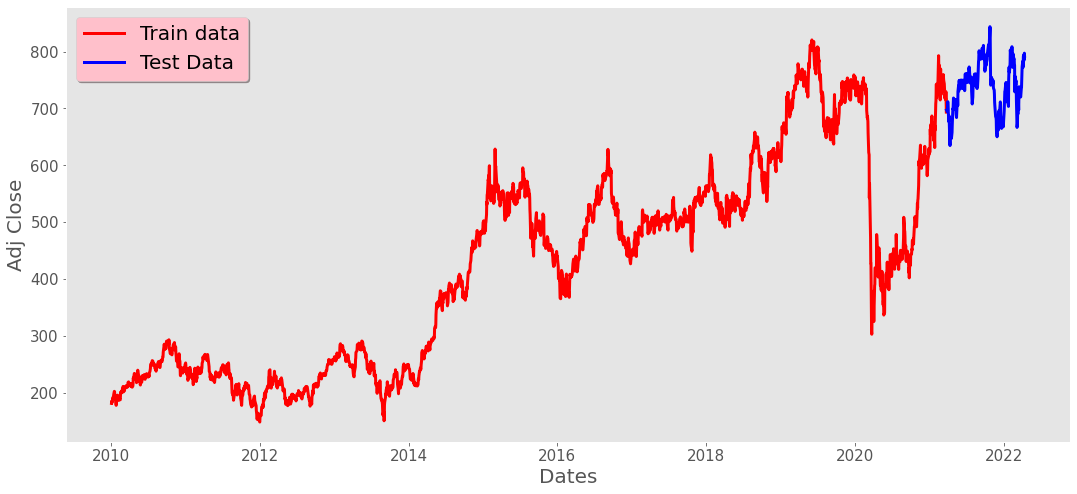

In [27]:
plt.figure(figsize=(18, 8))
plt.grid()
plt.xlabel("Dates" , fontsize=20)
plt.ylabel("Adj Close", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, color="red", linewidth=3, label="Train data")
plt.plot(test_data, color="blue", linewidth=3, label="Test Data")
plt.legend(facecolor="pink", fontsize=20, shadow=True)
plt.show()

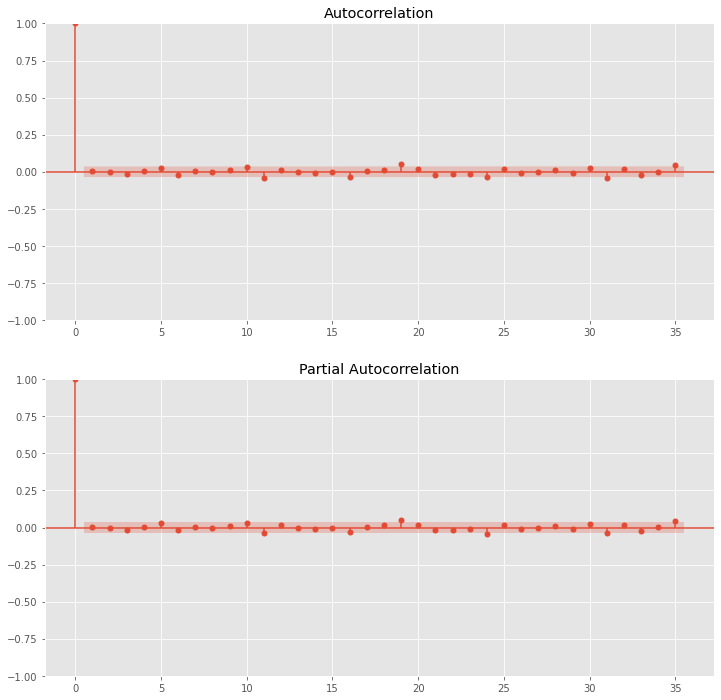

In [29]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_adj_close_diff, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_adj_close_diff, ax=ax2)

In [32]:
def arima_model(x, y, arima_order):
    history = [i for i in x]
    prediction=list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        prediction.append(yhat)
        history.append(y[t])
    rmse = np.sqrt(mean_squared_error(y, prediction))
    return rmse
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_order = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = arima_model(dataset, test, order)
                    if rmse< best_score:
                        best_score, best_order = rmse, order
                    print(f"ARIMA {order} RMSE{rmse}")
                except:
                    continue
    print(f"Best ARIMA model order:{best_order} and RMSE :{best_score}")

In [33]:
train_data = df[0:-260].values
test_data = df[-260:].values
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA (0, 0, 0) RMSE307.60240710683416
ARIMA (0, 0, 1) RMSE158.5654792712237
ARIMA (0, 0, 2) RMSE98.39259769360955
ARIMA (0, 1, 0) RMSE12.847996263500606
ARIMA (0, 1, 1) RMSE12.853636107653827
ARIMA (0, 1, 2) RMSE12.858932090483734
ARIMA (0, 2, 0) RMSE17.503076169209383
ARIMA (0, 2, 1) RMSE12.846476185395774
ARIMA (0, 2, 2) RMSE12.85169379934229
ARIMA (1, 0, 0) RMSE12.85750608876646
ARIMA (1, 0, 1) RMSE12.864206918785683
ARIMA (1, 0, 2) RMSE12.871734754190754
ARIMA (1, 1, 0) RMSE12.85353819102029
ARIMA (1, 1, 1) RMSE12.849851976948393
ARIMA (1, 1, 2) RMSE12.861803039195014
ARIMA (1, 2, 0) RMSE15.905962416287101
ARIMA (1, 2, 1) RMSE12.851830517908684
ARIMA (1, 2, 2) RMSE12.848201342707764
ARIMA (2, 0, 0) RMSE12.868446036316275
ARIMA (2, 0, 1) RMSE12.874728919303502
ARIMA (2, 0, 2) RMSE12.871086186391027
ARIMA (2, 1, 0) RMSE12.85877953060718
ARIMA (2, 1, 1) RMSE12.855776768790536
ARIMA (2, 1, 2) RMSE12.881755925281116
ARIMA (2, 2, 0) RMSE15.30574534817416
ARIMA (2, 2, 1) RMSE12.856764074

In [34]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(0, 2, 1))
    model_fit = model.fit()
    yt = model_fit.forecast()[0]
    predictions.append(yt)
    history.append(test_data[t])

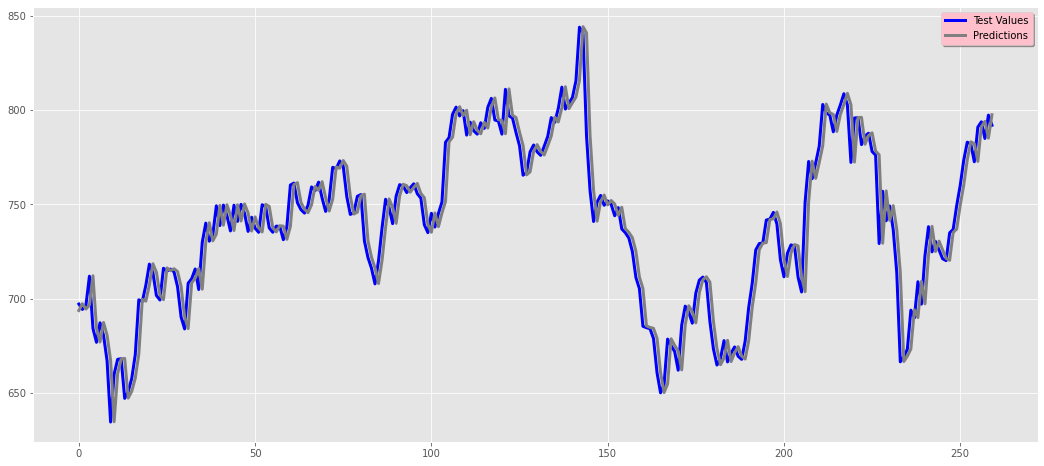

In [36]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(test_data, color="blue", linewidth=3, label="Test Values")
plt.plot(predictions, color="grey", linewidth=3, label="Predictions")
plt.legend(facecolor="pink", fontsize=10, shadow=True)
plt.show()

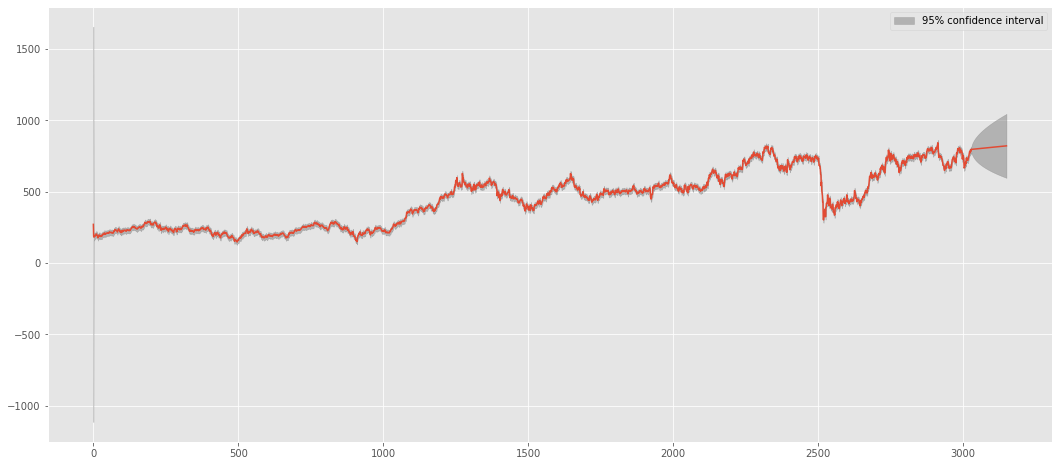

In [38]:
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(111)
plot_predict(model_fit, start=1, end = len(df["Adj Close"])+120, ax=ax1)
plt.show()